<a href="https://colab.research.google.com/github/mhieu2001/JAV-Analysis/blob/main/Japan_Adult_Video_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import datetime
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
import warnings 
warnings.filterwarnings('ignore')

In [ ]:
#Import the data from the computer,!git clone() to get data from git,github
from google.colab import files 
uploaded = files.upload () 
actress=pd.read_json("acctress.json")

Saving acctress.json to acctress (1).json


In [ ]:
actress1=pd.read_json("acctress.json")

In [ ]:
#Read the data sample 
actress.head(5)

,id,name,japanName,hiragana,bust,waist,hip,height,birthday,blood_type,hobby,prefectures
0,3,Kitagawa Yui,北川ゆい,きたがわゆい,95.0,60.0,88.0,NaN,1980-12-14,AB,クラシックバレエ,None
1,4,Akira,Akira,あきら,90.0,58.0,86.0,157.0,1978-08-15,A,水泳、ゴルフ,東京都
2,6,Cocolo,COCOLO,こころ,96.0,55.0,85.0,168.0,1982-07-07,B,パソコン,茨城県
3,8,Saiko,Saiko,さいこ,80.0,59.0,82.0,162.0,1983-04-12,O,料理、大食い,東京都
4,11,Aida Momo,あいだもも,あいだもも,82.0,55.0,89.0,162.0,1970-06-18,A,エアロビクス,東京都


In [ ]:
#Get the infomation of the data, get the type, count the null
actress.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11186 entries, 0 to 11185
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   id           11186 non-null  int64         
 1   name         11186 non-null  object        
 2   japanName    11186 non-null  object        
 3   hiragana     11186 non-null  object        
 4   bust         6456 non-null   float64       
 5   waist        6436 non-null   float64       
 6   hip          6428 non-null   float64       
 7   height       5012 non-null   float64       
 8   birthday     4031 non-null   datetime64[ns]
 9   blood_type   3171 non-null   object        
 10  hobby        3730 non-null   object        
 11  prefectures  4471 non-null   object        
 12  age          11186 non-null  float64       
dtypes: datetime64[ns](1), float64(5), int64(1), object(6)
memory usage: 1.1+ MB


There are over 11000 data entries but only over 4000 data birtdays. Moreover, data type is object - not datetime. 
So the first thing is change the datatype and calculate the age to get further analysis

In [ ]:
actress['birthday']=pd.to_datetime(actress['birthday'], yearfirst=True)
actress['age']=2023-pd.DatetimeIndex(actress['birthday']).year
actress.head(5)

,id,name,japanName,hiragana,bust,waist,hip,height,birthday,blood_type,hobby,prefectures,age
0,3,Kitagawa Yui,北川ゆい,きたがわゆい,95.0,60.0,88.0,NaN,1980-12-14,AB,クラシックバレエ,None,43.0
1,4,Akira,Akira,あきら,90.0,58.0,86.0,157.0,1978-08-15,A,水泳、ゴルフ,東京都,45.0
2,6,Cocolo,COCOLO,こころ,96.0,55.0,85.0,168.0,1982-07-07,B,パソコン,茨城県,41.0
3,8,Saiko,Saiko,さいこ,80.0,59.0,82.0,162.0,1983-04-12,O,料理、大食い,東京都,40.0
4,11,Aida Momo,あいだもも,あいだもも,82.0,55.0,89.0,162.0,1970-06-18,A,エアロビクス,東京都,53.0


In [ ]:
#Get the youngest actresses in the data
actress[actress['age']== actress.age.min()]

,id,name,japanName,hiragana,bust,waist,hip,height,birthday,blood_type,hobby,prefectures,age
9826,1059504,Maki Izuna,槙いずな,まきいずな,80.0,55.0,84.0,148.0,2001-01-27,None,読書,東京都,22.0
9933,1061822,Takeda Erena,武田エレナ,たけだえれな,NaN,NaN,NaN,NaN,2001-08-08,None,None,静岡県,22.0


In [ ]:
# Get the basis outlook about the numeric data
actress.describe()

,id,bust,waist,hip,height,age
count,1.118600e+04,6456.000000,6436.000000,6428.000000,5012.000000,4031.000000
mean,4.852872e+05,87.094253,58.898229,86.289203,158.713148,38.704788
std,5.076289e+05,6.155405,3.176163,3.829804,5.814022,7.262923
min,3.000000e+00,51.000000,48.000000,54.000000,134.000000,22.000000
25%,7.189000e+03,83.000000,58.000000,84.000000,155.000000,34.000000
50%,2.678500e+04,86.000000,58.000000,86.000000,158.000000,38.000000
75%,1.026770e+06,90.000000,60.000000,88.000000,163.000000,43.000000
max,1.063061e+06,153.000000,100.000000,125.000000,182.000000,68.000000


As you can see, the mean of actress around 38. With a quarter below 34, a half below 38 and only 25 percent over 43. The youngest are 22 and the oldest are 68. The same context can be explain for height and 3 measurements. 

In [ ]:
actress['age']=actress.age.fillna(38)
actress.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11186 entries, 0 to 11185
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   id           11186 non-null  int64         
 1   name         11186 non-null  object        
 2   japanName    11186 non-null  object        
 3   hiragana     11186 non-null  object        
 4   bust         6456 non-null   float64       
 5   waist        6436 non-null   float64       
 6   hip          6428 non-null   float64       
 7   height       5012 non-null   float64       
 8   birthday     4031 non-null   datetime64[ns]
 9   blood_type   3171 non-null   object        
 10  hobby        3730 non-null   object        
 11  prefectures  4471 non-null   object        
 12  age          11186 non-null  float64       
dtypes: datetime64[ns](1), float64(5), int64(1), object(6)
memory usage: 1.1+ MB


<Figure size 1500x1000 with 0 Axes>

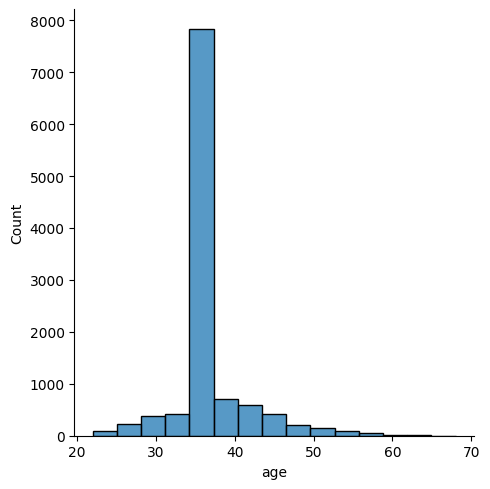

In [ ]:
plt.figure(figsize=(15,10))
sns.displot(actress.age)

Because we fill NA in the last action. the graph is bias in the 35. Thus, we clone the data and plot the raw data before fillna

In [ ]:
actress1.info(5)

<Figure size 1500x1000 with 0 Axes>

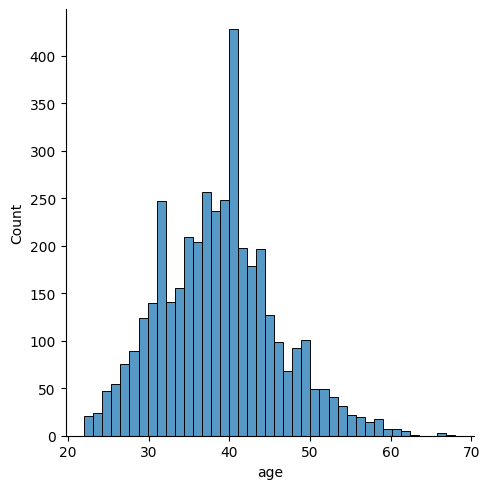

In [ ]:
plt.figure(figsize=(15,10))
sns.displot(actress1.age.dropna())
#Yeah, it's look make sense now

In [ ]:
#After running the age test, the next factor relate may be is the B-cup measurement. So let's do some analysis on Boobs
actress.describe()

,id,bust,waist,hip,height,age
count,1.118600e+04,6456.000000,6436.000000,6428.000000,5012.000000,11186.000000
mean,4.852872e+05,87.094253,58.898229,86.289203,158.713148,36.335062
std,5.076289e+05,6.155405,3.176163,3.829804,5.814022,4.708510
min,3.000000e+00,51.000000,48.000000,54.000000,134.000000,22.000000
25%,7.189000e+03,83.000000,58.000000,84.000000,155.000000,35.000000
50%,2.678500e+04,86.000000,58.000000,86.000000,158.000000,35.000000
75%,1.026770e+06,90.000000,60.000000,88.000000,163.000000,35.000000
max,1.063061e+06,153.000000,100.000000,125.000000,182.000000,68.000000


<Axes: ylabel='Frequency'>

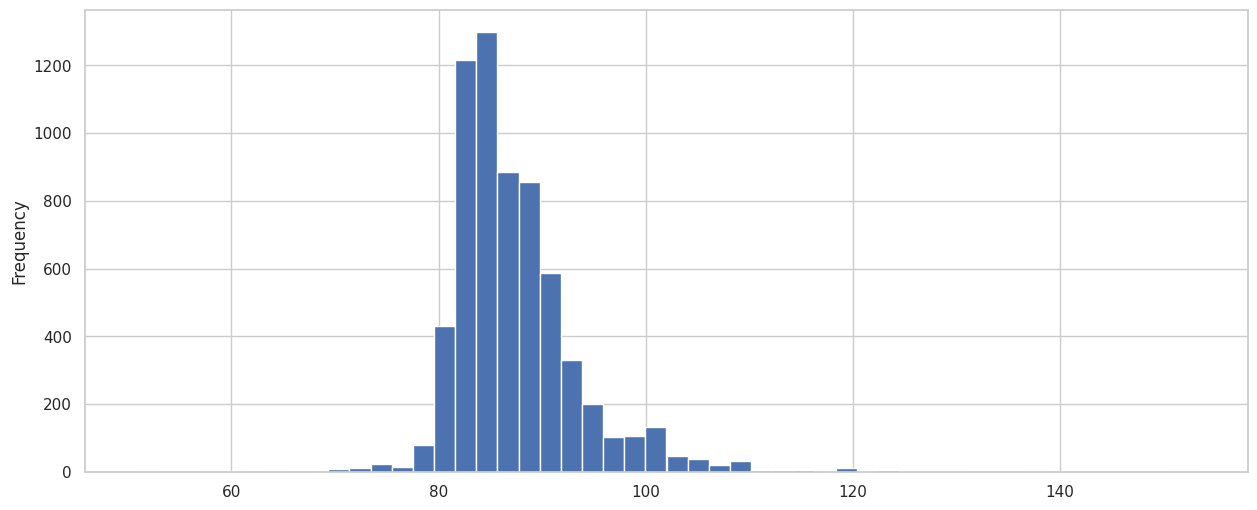

In [ ]:
sns.set_theme(style = 'whitegrid')
actress.bust.plot.hist(figsize=(15,6), bins=50)
# Most of number is in the 80 to 100 and small outlier

In [ ]:
#Searching actress by name #Mikami for example
actress[actress.name.str.contains("Mikami")]

,id,name,japanName,hiragana,bust,waist,hip,height,birthday,blood_type,hobby,prefectures,age
94,1117,Mikami Sati,三上さち,みかみさち,NaN,NaN,NaN,NaN,NaT,None,None,None,35.0
95,1118,Mikami Syun,三上しゅん,みかみしゅん,NaN,NaN,NaN,NaN,NaT,None,None,None,35.0
96,1119,Mikami Ran,三上蘭,みかみらん,84.0,59.0,86.0,NaN,1982-12-16,O,None,None,41.0
625,13127,Mikami Runa,美神ルナ,みかみるな,88.0,58.0,85.0,163.0,1984-06-01,O,ダンス、旅行、ダイビング、英会話,東京都,39.0
677,13586,Mikami Yuuki,三上夕希,みかみゆうき,86.0,65.0,89.0,168.0,NaT,None,None,None,35.0
1762,20124,Mikami Seri,美上セリ,みかみせり,83.0,58.0,82.0,160.0,1987-03-15,B,ショッピング、ダーツ,東京都,36.0
2258,22162,Mikami Nana,美神奈々,みかみなな,NaN,NaN,NaN,NaN,NaT,None,None,None,35.0
3207,26885,Mikami Sihori,三神しほり,みかみしほり,NaN,NaN,NaN,NaN,NaT,None,None,,35.0
3305,27668,Mikami Rion,三上リオン,みかみりおん,88.0,59.0,82.0,147.0,NaT,None,,,35.0
3391,27889,Mikami Seira,美神聖良,みかみせいら,NaN,NaN,NaN,NaN,NaT,None,None,,35.0


In [ ]:
#After running the numeric analysis, let's do some non-numerical ones. Starting with clouding hobby but reduce NA in data
from wordcloud import WordCloud

In [ ]:
hobby_df=actress[actress.hobby.notnull()]
hobby_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3730 entries, 0 to 11185
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   id           3730 non-null   int64         
 1   name         3730 non-null   object        
 2   japanName    3730 non-null   object        
 3   hiragana     3730 non-null   object        
 4   bust         3523 non-null   float64       
 5   waist        3539 non-null   float64       
 6   hip          3539 non-null   float64       
 7   height       3045 non-null   float64       
 8   birthday     3056 non-null   datetime64[ns]
 9   blood_type   2610 non-null   object        
 10  hobby        3730 non-null   object        
 11  prefectures  2665 non-null   object        
 12  age          3730 non-null   float64       
dtypes: datetime64[ns](1), float64(5), int64(1), object(6)
memory usage: 408.0+ KB


In [ ]:
hobby_txt=''.join(hobby_df['hobby'])

In [ ]:
from matplotlib import rcParams
rcParams['figure.figsize']=15,8
wordcloud=WordCloud(font_path='jp.otf',max_words=200,max_font_size=40,scale=3).generate(hobby_txt)

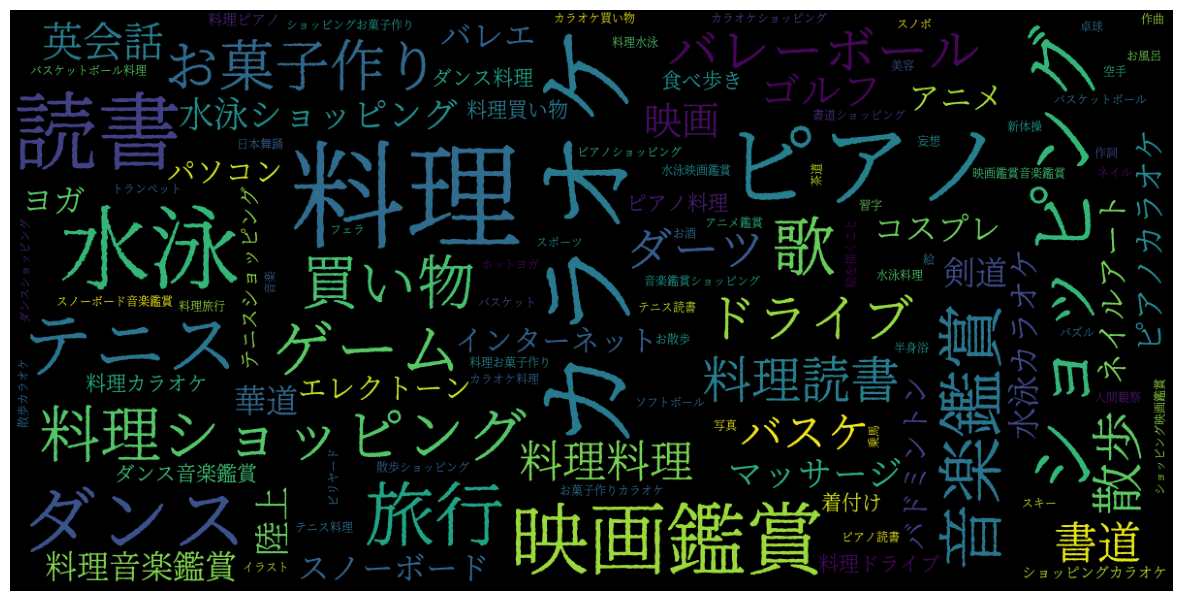

In [ ]:
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

In [ ]:
from PIL import Image

In [ ]:
mask = np.array(Image.open("mask_black.png"))
wordcloud=WordCloud(font_path='jp.otf',background_color="white",mask=mask).generate(hobby_txt)

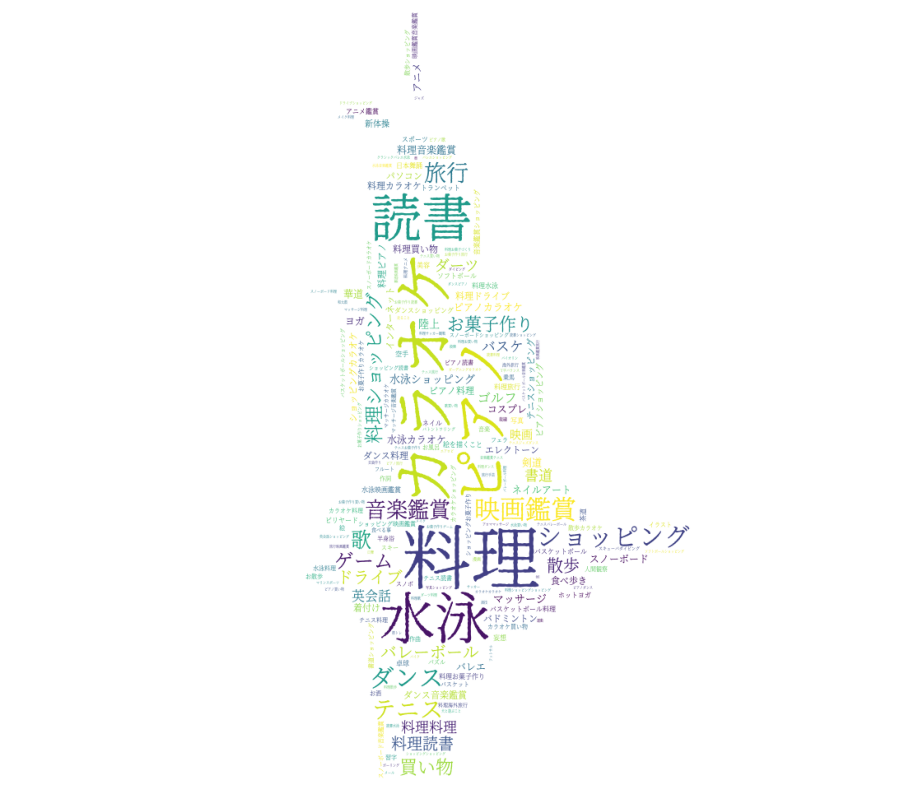

In [ ]:
plt.figure(figsize=(20,10))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

OK It done with the basic exploration analysis. Now is the job for AI, the recommend system based on the data above. Using Kmeans method to clustering unlabel data. Experience-oriented project so do not take importance on Accuracy, Confusion matrix, f-score . . .

In [ ]:
from sklearn.cluster import KMeans
from sklearn import metrics

In [ ]:
actress.head(5)

,id,name,japanName,hiragana,bust,waist,hip,height,birthday,blood_type,hobby,prefectures
0,3,Kitagawa Yui,北川ゆい,きたがわゆい,95.0,60.0,88.0,NaN,1980-12-14,AB,クラシックバレエ,None
1,4,Akira,Akira,あきら,90.0,58.0,86.0,157.0,1978-08-15,A,水泳、ゴルフ,東京都
2,6,Cocolo,COCOLO,こころ,96.0,55.0,85.0,168.0,1982-07-07,B,パソコン,茨城県
3,8,Saiko,Saiko,さいこ,80.0,59.0,82.0,162.0,1983-04-12,O,料理、大食い,東京都
4,11,Aida Momo,あいだもも,あいだもも,82.0,55.0,89.0,162.0,1970-06-18,A,エアロビクス,東京都


In [ ]:
df=actress[['bust','waist','hip','height','blood_type']]
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11186 entries, 0 to 11185
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   bust        6456 non-null   float64
 1   waist       6436 non-null   float64
 2   hip         6428 non-null   float64
 3   height      5012 non-null   float64
 4   blood_type  3171 non-null   object 
dtypes: float64(4), object(1)
memory usage: 437.1+ KB


In [ ]:
df=df.dropna()
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2678 entries, 1 to 11185
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   bust        2678 non-null   float64
 1   waist       2678 non-null   float64
 2   hip         2678 non-null   float64
 3   height      2678 non-null   float64
 4   blood_type  2678 non-null   object 
dtypes: float64(4), object(1)
memory usage: 125.5+ KB


In [ ]:
#Dummy the type of blood
df.blood_type.value_counts()

A     1100
O      939
B      422
AB     217
Name: blood_type, dtype: int64

In [ ]:
mapper = {'O':0,'A':1,'B':2,'AB':3}
df['blood_type']=df['blood_type'].map(mapper)
df.head()

,bust,waist,hip,height,blood_type
1,90.0,58.0,86.0,157.0,1
2,96.0,55.0,85.0,168.0,2
3,80.0,59.0,82.0,162.0,0
4,82.0,55.0,89.0,162.0,1
6,85.0,60.0,88.0,165.0,1


In [ ]:
actress_np=df.to_numpy()
actress_np

array([[ 90.,  58.,  86., 157.,   1.],
       [ 96.,  55.,  85., 168.,   2.],
       [ 80.,  59.,  82., 162.,   0.],
       ...,
       [ 83.,  58.,  85., 165.,   0.],
       [ 88.,  58.,  87., 153.,   0.],
       [ 88.,  59.,  86., 161.,   2.]])

In [ ]:
k_mean_5= KMeans(n_clusters=5)
k_mean_5.fit(actress_np)
label_5=k_mean_5.labels_

In [ ]:
label_5

array([4, 1, 3, ..., 1, 4, 1], dtype=int32)

- The Silhouette score: Calculate the **mean distance** between a sample and all other points in the **next nearest cluster** minus The mean distance between a sample and all other points in the **same class**. Then divide to max(a,b). 
- The score is bounded between -1 for incorrect clustering and +1 for highly dense clustering. Scores around zero indicate overlapping clusters

In [ ]:
metrics.silhouette_score(actress_np,label_5,metric='euclidean')

0.23729435271494842

- The Calinski-Harabasz scoreis the **ratio of the sum** of **between-clusters dispersion** and of **inter-cluster dispersion** for all clusters.

In [ ]:
metrics.calinski_harabasz_score(actress_np,label_5)

1065.3185265339616

In [ ]:
#Try with more cluster
k_mean_10= KMeans(n_clusters=10)
k_mean_10.fit(actress_np)
label_10=k_mean_10.labels_

In [ ]:
metrics.silhouette_score(actress_np,label_10,metric='euclidean')

0.19032104024468927

In [ ]:
metrics.calinski_harabasz_score(actress_np,label_10)

768.5532319722604

The 10 cluster is worse performance than 5. So we know that is not the more is the better. But how many cluster should we try in the test or maybe in the bigger data concept ? That is the question and we can not guess only. We use the method which called: **Elbow method**. To be in short, running multiple times, plotting and finding the tuning point.  

In [ ]:
sum_distance=[]
K=range(1,15)
for k in K:
  k_mean= KMeans(n_clusters=k)
  k_mean.fit(actress_np)
  sum_distance.append(k_mean.inertia_)

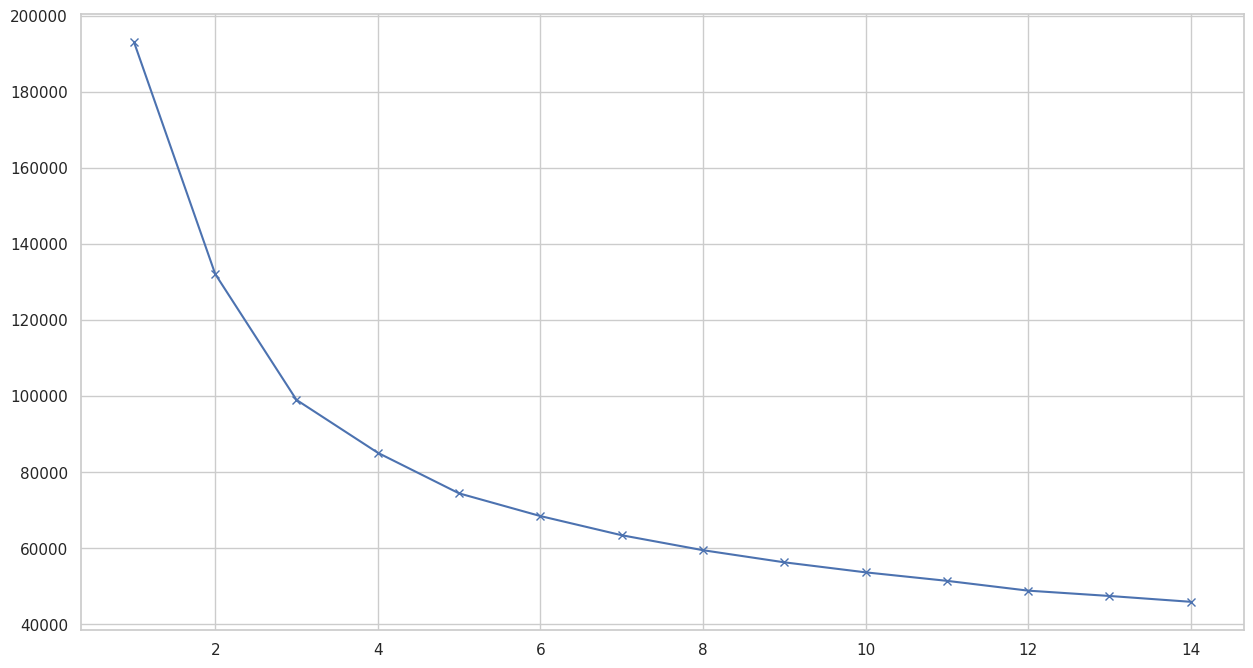

In [ ]:
plt.plot(K,sum_distance,'bx-')
plt.show()

In [ ]:
#As you can see, the tuning point lay on the 3 to 4 cluster, but starting from 4 cluster, the performance of data will reduce. So we should devide into 3 clusters.
k_mean_3= KMeans(n_clusters=3)
model=k_mean_3.fit(actress_np)
result=k_mean_3.labels_

In [ ]:
result

array([0, 1, 2, ..., 2, 0, 2], dtype=int32)

In [ ]:
metrics.silhouette_score(actress_np,result,metric='euclidean')

0.30422441591177096

In [ ]:
metrics.calinski_harabasz_score(actress_np,result)

1271.406189608148

In [ ]:
df.head()

,bust,waist,hip,height,blood_type
1,90.0,58.0,86.0,157.0,1
2,96.0,55.0,85.0,168.0,2
3,80.0,59.0,82.0,162.0,0
4,82.0,55.0,89.0,162.0,1
6,85.0,60.0,88.0,165.0,1


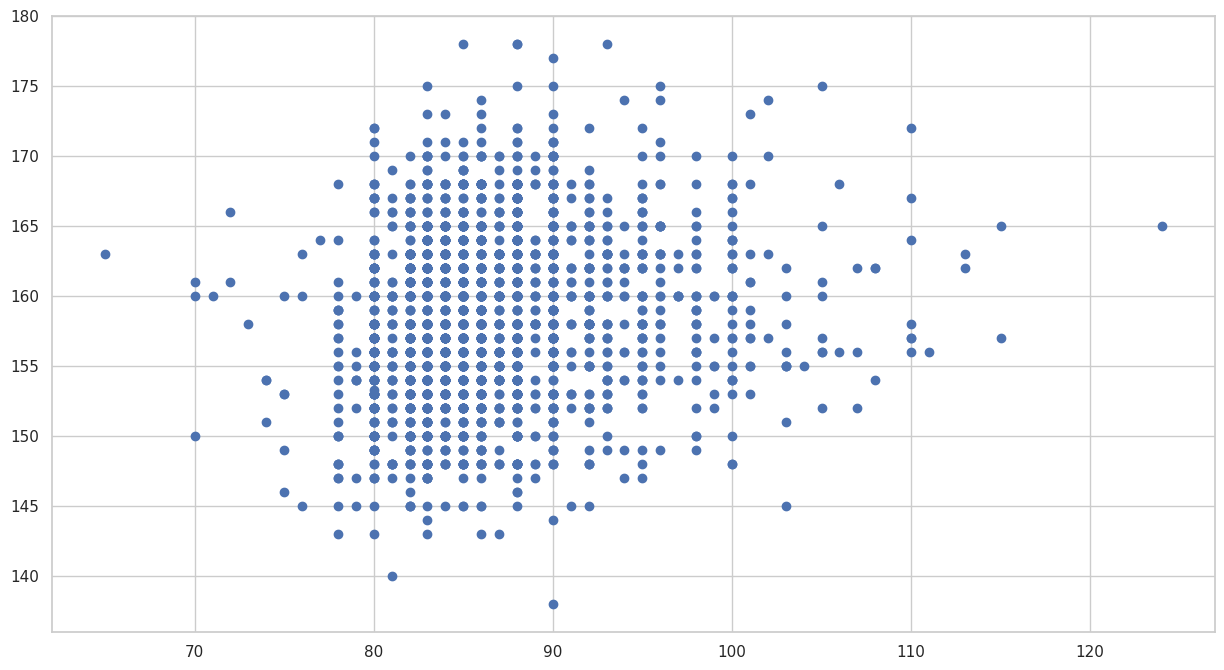

In [ ]:
#Scatter based on bust and height
plt.scatter(actress_np[:,0],actress_np[:,3])
plt.show()

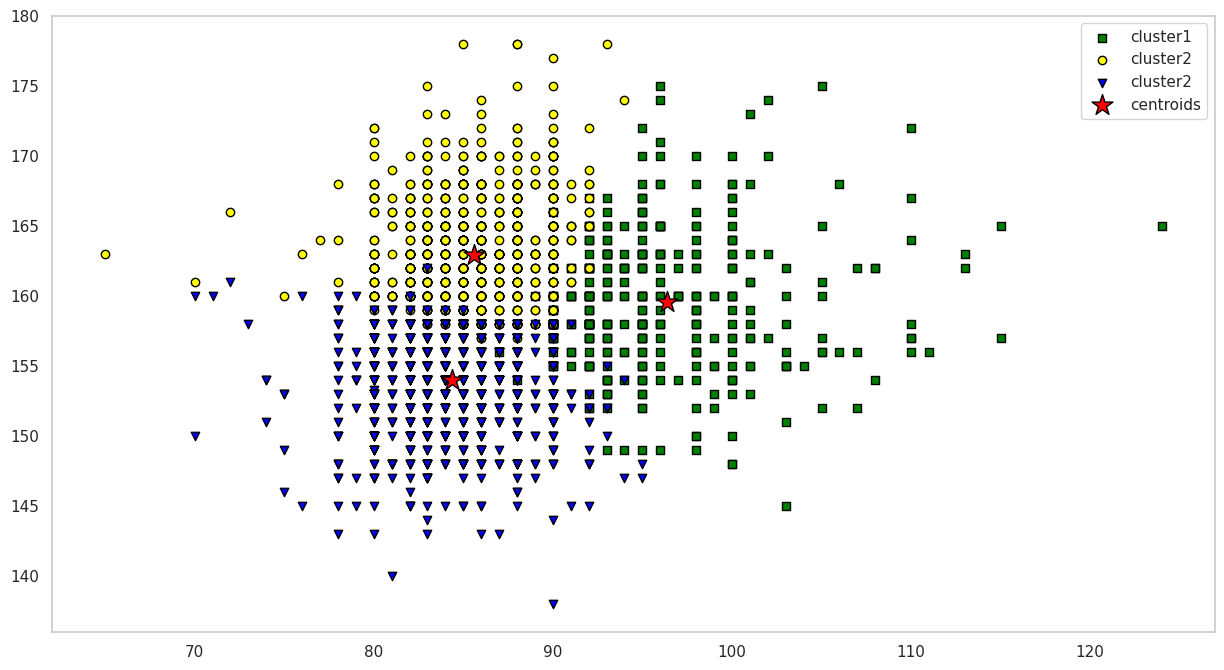

In [ ]:
plt.scatter(
    actress_np[result==0,0],actress_np[result==0,3],
    c='green',
    marker='s', edgecolor='black',
    label='cluster1'
)
plt.scatter(
    actress_np[result==1,0],actress_np[result==1,3],
    c='yellow',
    marker='o', edgecolor='black',
    label='cluster2'
)
plt.scatter(
    actress_np[result==2,0],actress_np[result==2,3],
    c='blue',
    marker='v', edgecolor='black',
    label='cluster2'
)
plt.scatter(
    model.cluster_centers_[:,0],model.cluster_centers_[:,3],
    s=250, marker='*',
    c='red', edgecolor='black',
    label='centroids'
)
plt.legend(scatterpoints=1)
plt.grid()
plt.show()

Basic recommend system: 
- Get input by numeric. 
- Find cluster which containing.
- Print random a number of actress that satisfy the input. 

In [ ]:
df1= actress[['id','bust','waist','hip','height','blood_type']]
df1=df1.dropna()
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2678 entries, 1 to 11185
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   id          2678 non-null   int64  
 1   bust        2678 non-null   float64
 2   waist       2678 non-null   float64
 3   hip         2678 non-null   float64
 4   height      2678 non-null   float64
 5   blood_type  2678 non-null   object 
dtypes: float64(4), int64(1), object(1)
memory usage: 146.5+ KB


In [ ]:
df1.head(5)

,id,bust,waist,hip,height,blood_type
1,4,90.0,58.0,86.0,157.0,A
2,6,96.0,55.0,85.0,168.0,B
3,8,80.0,59.0,82.0,162.0,O
4,11,82.0,55.0,89.0,162.0,A
6,17,85.0,60.0,88.0,165.0,A


In [ ]:
df2=actress[['id','name','japanName']]
df2.head(5)

,id,name,japanName
0,3,Kitagawa Yui,北川ゆい
1,4,Akira,Akira
2,6,Cocolo,COCOLO
3,8,Saiko,Saiko
4,11,Aida Momo,あいだもも


In [ ]:
lookup=df1.merge(df2,on='id',how='left')
lookup.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2678 entries, 0 to 2677
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   id          2678 non-null   int64  
 1   bust        2678 non-null   float64
 2   waist       2678 non-null   float64
 3   hip         2678 non-null   float64
 4   height      2678 non-null   float64
 5   blood_type  2678 non-null   object 
 6   name        2678 non-null   object 
 7   japanName   2678 non-null   object 
dtypes: float64(4), int64(1), object(3)
memory usage: 188.3+ KB


In [ ]:
lookup['cluster']=result
lookup.head(5)

,id,bust,waist,hip,height,blood_type,name,japanName,cluster
0,4,90.0,58.0,86.0,157.0,A,Akira,Akira,0
1,6,96.0,55.0,85.0,168.0,B,Cocolo,COCOLO,1
2,8,80.0,59.0,82.0,162.0,O,Saiko,Saiko,2
3,11,82.0,55.0,89.0,162.0,A,Aida Momo,あいだもも,2
4,17,85.0,60.0,88.0,165.0,A,Aduki Miyu,あづき美由,2


In [ ]:
def recommend(model, vong1, vong2, vong3, chieu_cao, nhom_mau):
  arr=np.array([[vong1,vong2,vong3, chieu_cao, nhom_mau]])
  pred=model.predict(arr)
  return lookup[lookup['cluster']==pred[0]].sample(10)

In [ ]:
vong1=86
vong2=55
vong3=90
chieu_cao=160
nhom_mau=1

recommend(model,vong1,vong2,vong3, chieu_cao, nhom_mau)

,id,bust,waist,hip,height,blood_type,name,japanName,cluster
13,63,83.0,57.0,85.0,160.0,O,Kuramoto Mai,くらもとまい（葉月ありさ）,2
1115,2686,85.0,58.0,84.0,162.0,O,Mituki Manaka,美月まなか,2
897,2345,84.0,58.0,88.0,160.0,B,Siina Haruyo,椎名陽世,2
1830,1023428,87.0,60.0,86.0,160.0,O,Nisino Hikari,西野ひかり,2
737,21018,87.0,58.0,85.0,162.0,B,Mayama Yuuka,真山ゆうか,2
1362,1003751,87.0,57.0,88.0,158.0,B,Aoi Eri,葵えり,2
2002,4473,85.0,57.0,86.0,160.0,O,Kaiman Hitomi,貝満ひとみ,2
1720,1019465,85.0,56.0,86.0,164.0,B,Miyabi,MIYABI,2
1448,1006720,86.0,60.0,88.0,167.0,O,Hayasaka Azuki,早坂あずき,2
2196,1047549,90.0,62.0,88.0,165.0,O,Kuromiya Eimi,黒宮えいみ,2
